In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import chi2_contingency

from ordinor.io import read_disco_csv

In [2]:
el = read_disco_csv('data/processed/wabo.csv')
el

Importing from CSV file data/processed/wabo.csv
Scanned 6641 events from "data/processed/wabo.csv".
--------------------------------------------------------------------------------
Number of events:		6641
Number of cases:		1348
--------------------------------------------------------------------------------


,Unnamed: 0,case:concept:name,org:resource,time:timestamp,r:org:group,r:group,concept:name,responsible,r:department,ct:channel,tt:month,tt:day,tt:weekday,tt:ampm,@@index
0,0,case-10011,Resource21,2011-10-11 21:45:40.276000+00:00,Group 1,Group 2,Confirmation of receipt,Resource21,General,Internet,Oct,Day_11,Tue,PM,0
1,1,case-10011,Resource10,2011-10-12 16:26:25.398000+00:00,Group 4,Group 2,T02 Check confirmation of receipt,Resource21,General,Internet,Oct,Day_12,Wed,PM,1
2,2,case-10011,Resource21,2011-11-25 00:36:51.302000+00:00,Group 1,Group 2,T03 Adjust confirmation of receipt,Resource21,General,Internet,Nov,Day_25,Fri,AM,2
3,3,case-10011,Resource21,2011-11-25 00:37:16.553000+00:00,Group 4,Group 2,T02 Check confirmation of receipt,Resource21,General,Internet,Nov,Day_25,Fri,AM,3
4,5,case-10017,Resource30,2011-10-18 21:47:06.950000+00:00,Group 1,Group 5,T06 Determine necessity of stop advice,Resource04,General,Internet,Oct,Day_18,Tue,PM,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,8572,case-9997,Resource06,2011-10-18 17:04:48.732000+00:00,Group 4,Group 5,T02 Check confirmation of receipt,Resource06,General,Internet,Oct,Day_18,Tue,PM,6636
6637,8573,case-9997,Resource06,2011-10-18 17:05:12.359000+00:00,Group 3,Group 5,T04 Determine confirmation of receipt,Resource06,General,Internet,Oct,Day_18,Tue,PM,6637
6638,8574,case-9997,Resource06,2011-10-18 17:05:30.196000+00:00,Group 2,Group 5,T05 Print and send confirmation of receipt,Resource06,General,Internet,Oct,Day_18,Tue,PM,6638
6639,8575,case-9997,Resource06,2011-10-18 17:06:01.468000+00:00,Group 1,Group 5,T06 Determine necessity of stop advice,Resource06,General,Internet,Oct,Day_18,Tue,PM,6639


In [3]:
# specification

all_cand_attrs = [
    {'attr': 'ct:channel', 'attr_type': 'categorical', 'attr_dim': 'CT'},
    #{'attr': 'concept:name', 'attr_type': 'categorical', 'attr_dim': 'AT'},
    {'attr': 'tt:weekday', 'attr_type': 'categorical', 'attr_dim': 'TT'}, 
    {'attr': 'tt:ampm', 'attr_type': 'categorical', 'attr_dim': 'TT'},
]

spec = dict()
spec['cand_attrs'] = all_cand_attrs

In [4]:
# categorical variables

cat_cols = [row['attr'] for row in all_cand_attrs]
cat_col_pairs = list(combinations(cat_cols, r=2))
cat_col_pairs

[('ct:channel', 'tt:weekday'),
 ('ct:channel', 'tt:ampm'),
 ('tt:weekday', 'tt:ampm')]

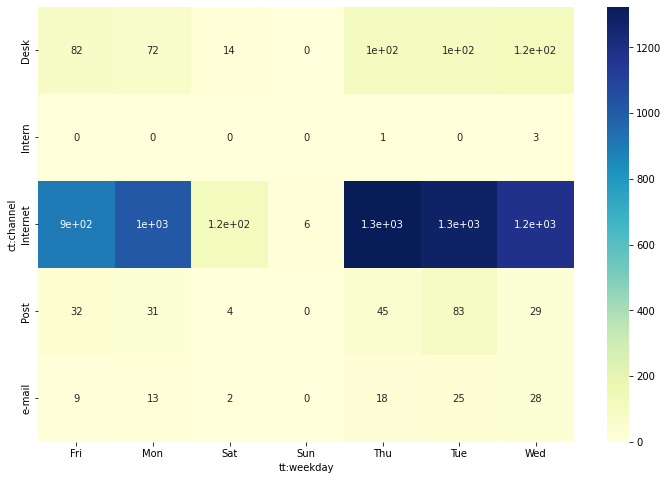

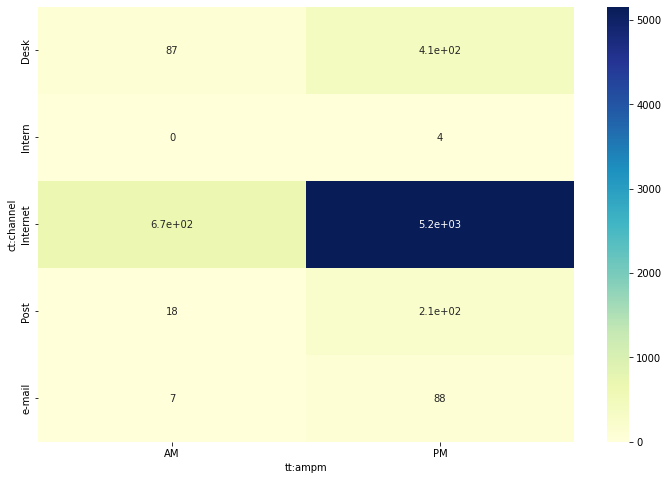

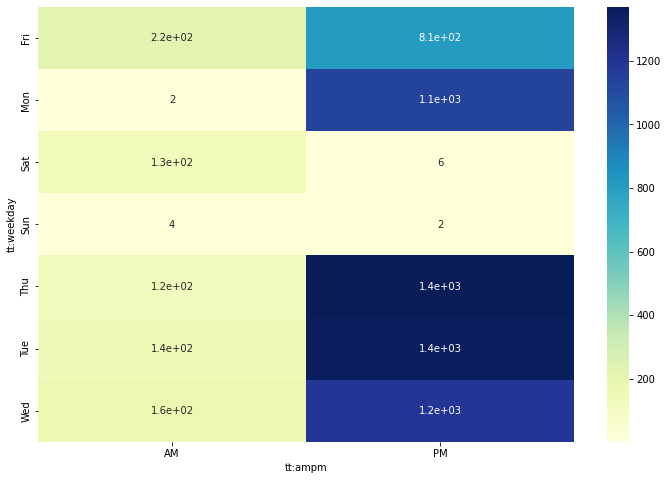

In [5]:
for col_pair in cat_col_pairs:
    mat_contingency = pd.crosstab(el[col_pair[0]], el[col_pair[1]])
    #chi2_val, p_val, deg_freedom, arr_exp_freq = chi2_contingency(mat_contingency)
    plt.figure(figsize=(12,8)) 
    sns.heatmap(mat_contingency, annot=True, cmap="YlGnBu")